In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset_mood_smartphone.csv")

In [3]:
df

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [4]:
df.isnull().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

Unnamed: 0      int64
id             object
time           object
variable       object
value         float64
dtype: object

In [7]:
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date
df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)

df

,index,id,time,variable,value,date
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000,2014-02-26
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000,2014-02-26
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000,2014-02-26
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000,2014-02-26
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000,2014-02-27
...,...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032,2014-04-11
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008,2014-04-19
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026,2014-04-26
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033,2014-04-27


In [8]:
# Assuming 'df' is your DataFrame that includes a 'variable' column
variable_values_list = df['variable'].unique().tolist()

# Now 'variable_values_list' contains all unique variable values as a list
print(variable_values_list)


['mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 'appCat.weather']


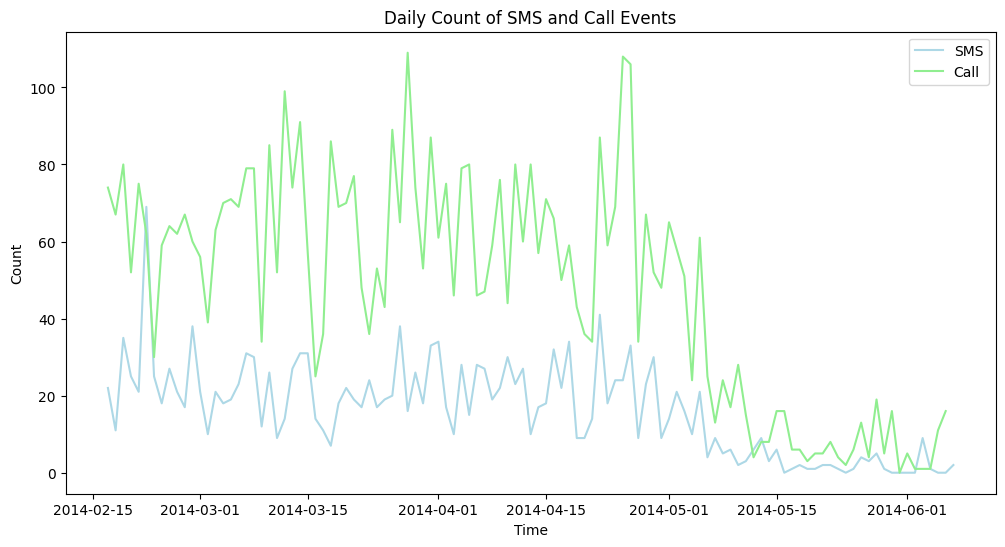

In [9]:
# Assuming your dataframe has a 'time' column in datetime format
# If not, convert it: df['time'] = pd.to_datetime(df['time'])

sms_data = df[df['variable'] == 'sms'].resample('D', on='time').count()  # Example for daily counts
call_data = df[df['variable'] == 'call'].resample('D', on='time').count()  # Adjust resampling as needed

plt.figure(figsize=(12, 6))
plt.plot(sms_data.index, sms_data['value'], label='SMS', color='lightblue')
plt.plot(call_data.index, call_data['value'], label='Call', color='lightgreen')
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Daily Count of SMS and Call Events')
plt.legend()
plt.show()


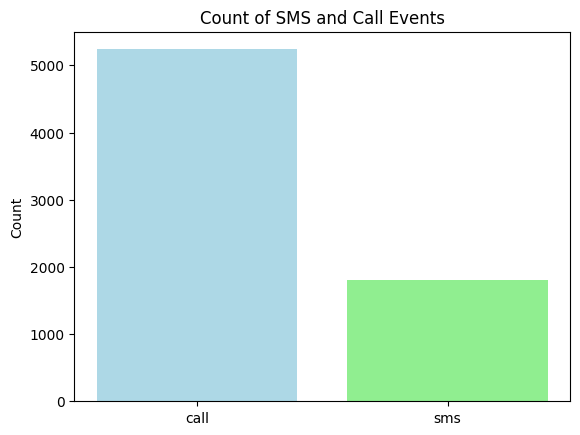

In [10]:
# Filter for SMS and call data
sms_call_data = df[df['variable'].isin(['sms', 'call'])]

# Count the number of events for each type
event_counts = sms_call_data['variable'].value_counts()

# Plotting
plt.bar(event_counts.index, event_counts.values, color=['lightblue', 'lightgreen'])
plt.ylabel('Count')
plt.title('Count of SMS and Call Events')
plt.show()

In [11]:
df_counts = sms_call_data.groupby(['id', 'variable'])['value'].count().reset_index(name='count')

# Check the aggregated counts to understand the distribution
df_counts.head()

,id,variable,count
0,AS14.01,call,151
1,AS14.01,sms,39
2,AS14.02,call,451
3,AS14.02,sms,81
4,AS14.03,call,223


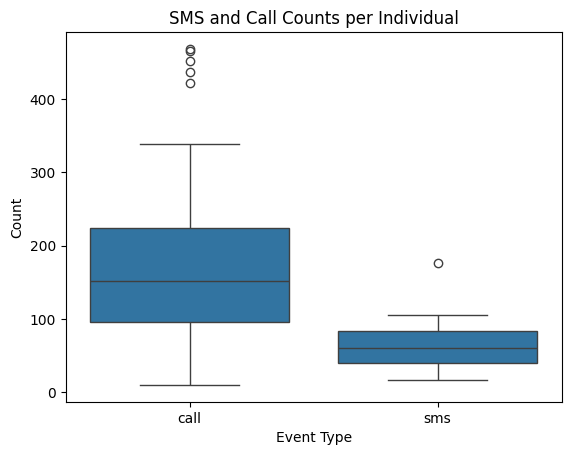

In [12]:
# For identifying outliers visually, a boxplot can be effective
sns.boxplot(data=df_counts, x='variable', y='count')
plt.title('SMS and Call Counts per Individual')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

In [13]:
df_filtered = df[df['variable'].isin(['sms', 'call'])]

# Aggregate counts by individual and event type
counts = df_filtered.groupby(['id', 'variable'])['value'].size().reset_index(name='count')

# Determine the IQR for outlier detection
Q1 = counts['count'].quantile(0.25)
Q3 = counts['count'].quantile(0.75)
IQR = Q3 - Q1
outliers_threshold_low = Q1 - 1.5 * IQR
outliers_threshold_high = Q3 + 1.5 * IQR

# Identify outliers
outliers = counts[(counts['count'] < outliers_threshold_low) | (counts['count'] > outliers_threshold_high)]

In [14]:
outliers

,id,variable,count
2,AS14.02,call,451
22,AS14.15,call,339
28,AS14.19,call,436
36,AS14.25,call,422
50,AS14.32,call,465
52,AS14.33,call,468


## !!!! IDK which would be a correct way to see the outliers in calls/sms. :P !!!

In [15]:
# Filter for 'sms' and 'call' events
df_sms_call = df[df['variable'].isin(['sms', 'call'])]

# Group by individual ('id'), variable, and date to count daily events
daily_counts = df_sms_call.groupby(['id', 'variable', df_sms_call['time'].dt.date]).size().reset_index(name='daily_count')


In [16]:
# Calculate IQR for daily counts
Q1 = daily_counts['daily_count'].quantile(0.25)
Q3 = daily_counts['daily_count'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those beyond 1.5 times the IQR from the quartiles
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outlier rows based on daily counts
outliers = daily_counts[(daily_counts['daily_count'] < lower_bound) | (daily_counts['daily_count'] > upper_bound)]


In [17]:
daily_counts

,id,variable,time,daily_count
0,AS14.01,call,2014-02-17,2
1,AS14.01,call,2014-02-18,1
2,AS14.01,call,2014-02-19,7
3,AS14.01,call,2014-02-20,2
4,AS14.01,call,2014-02-22,2
...,...,...,...,...
2067,AS14.33,sms,2014-05-25,1
2068,AS14.33,sms,2014-05-26,3
2069,AS14.33,sms,2014-05-27,2
2070,AS14.33,sms,2014-05-28,1


# Find Outliers

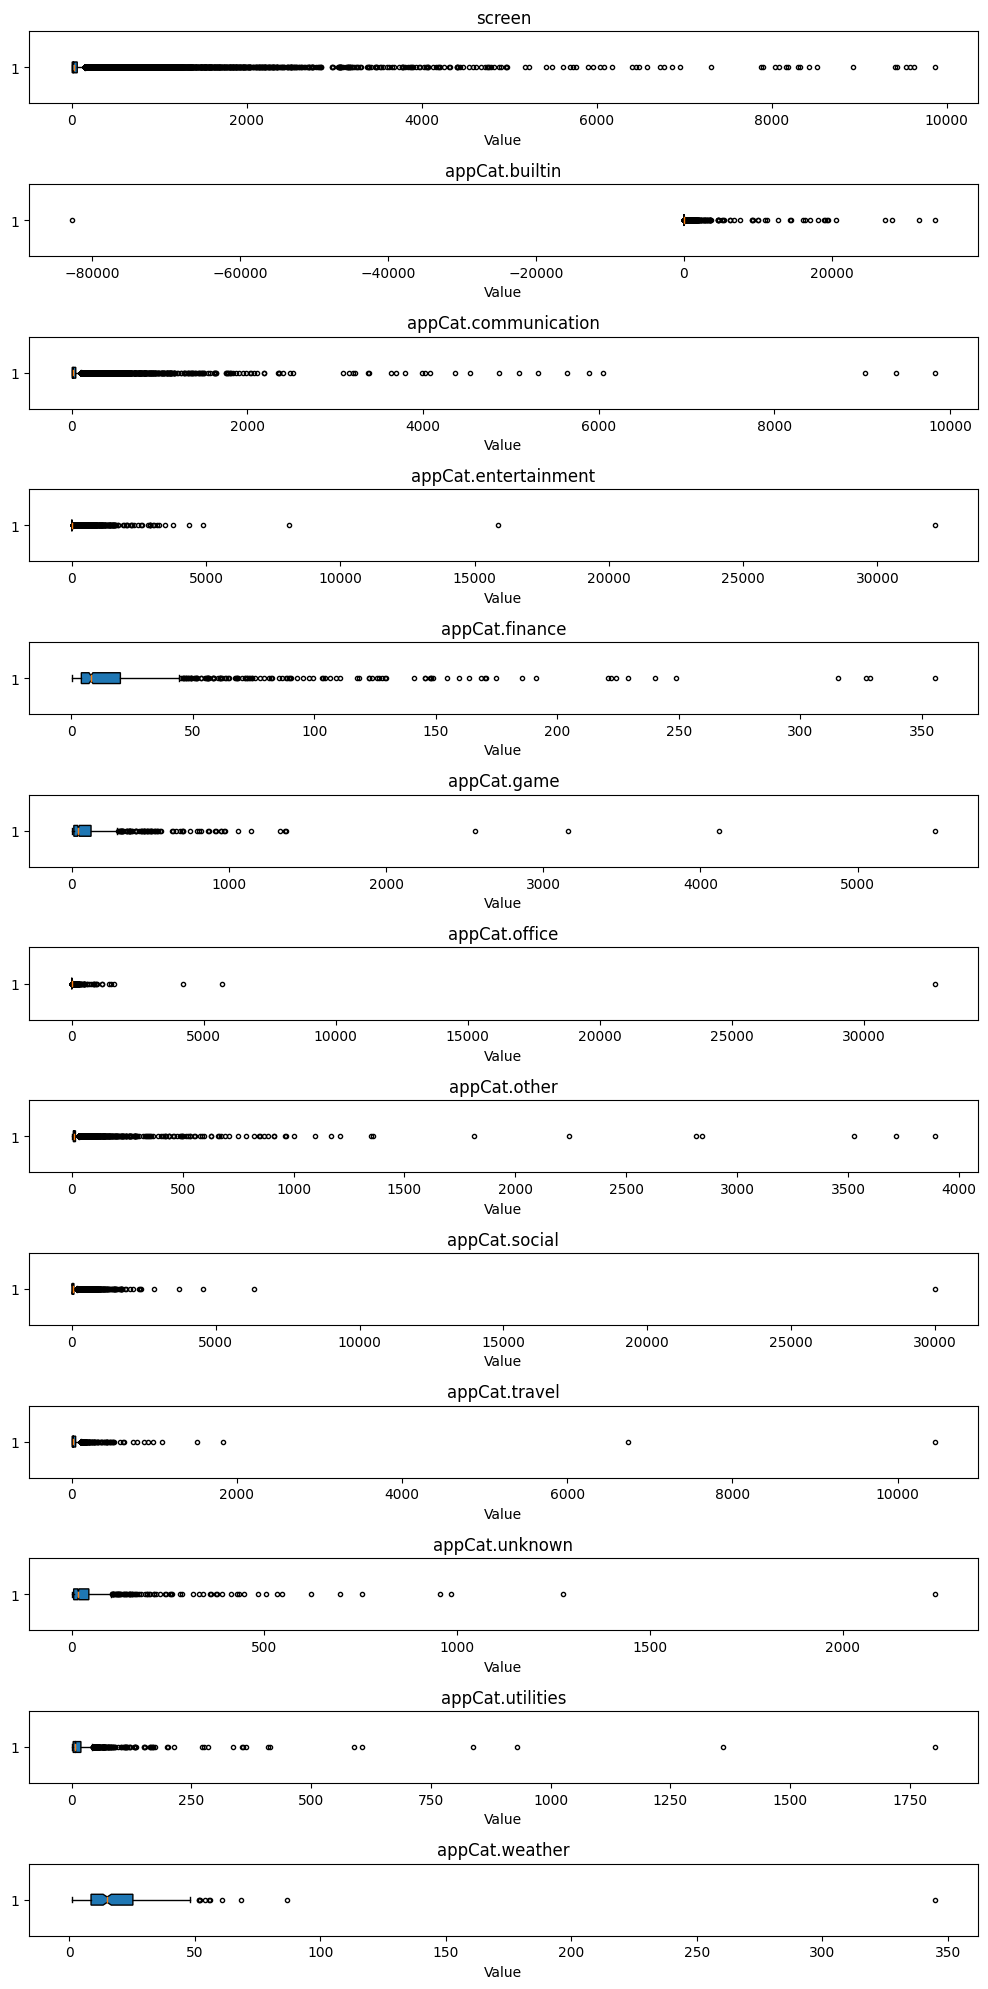

In [18]:
# Including all app categories and screen time for box plots
variables_for_box_plots_all = [
    'screen', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment',
    'appCat.finance', 'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social',
    'appCat.travel', 'appCat.unknown', 'appCat.utilities', 'appCat.weather'
]

# Prepare the figure to plot box plots for the expanded set of variables
fig, axs = plt.subplots(len(variables_for_box_plots_all), 1, figsize=(10, 20))

# Ensuring that we plot even if there's only one variable (turning axs into an array if it's not)
if len(variables_for_box_plots_all) == 1:
    axs = [axs]

for ax, variable in zip(axs, variables_for_box_plots_all):
    var_df = df[df['variable'] == variable]
    
    # Creating box plots with increased flier size for better visibility
    ax.boxplot(var_df['value'], vert=False, patch_artist=True, notch=True, flierprops={'marker':'o', 'markersize':3})
    ax.set_title(variable)
    ax.set_xlabel('Value')

plt.tight_layout()
plt.show()


In [19]:
# Filter the dataset for mood, arousal, and valence
mood_data = df[df['variable'] == 'mood']
arousal_data = df[df['variable'] == 'circumplex.arousal']
valence_data = df[df['variable'] == 'circumplex.valence']
activity_data = df[df['variable'] == 'activity']

# Check the range of values and presence of NaN values for mood, arousal, and valence
mood_range = (mood_data['value'].min(), mood_data['value'].max(), mood_data['value'].isnull().sum(axis = 0))
arousal_range = (arousal_data['value'].min(), arousal_data['value'].max(), arousal_data['value'].isnull().sum(axis = 0))
valence_range = (valence_data['value'].min(), valence_data['value'].max(), valence_data['value'].isnull().sum(axis = 0))
activity_range = (activity_data['value'].min(), activity_data['value'].max(), activity_data['value'].isnull().sum(axis = 0))

mood_range, arousal_range, valence_range, activity_range


((1.0, 10.0, 0), (-2.0, 2.0, 46), (-2.0, 2.0, 156), (0.0, 1.0, 0))

In [20]:
mood_data['time'].nunique(), arousal_data['time'].nunique(), valence_data['time'].nunique(), activity_data['time'].nunique()

(1113, 1113, 1113, 1982)

In [21]:
mood_data['date'].nunique(), arousal_data['date'].nunique(), valence_data['date'].nunique(), activity_data['date'].nunique()

(98, 98, 98, 85)

In [22]:
# Assuming 'df' is your loaded DataFrame containing all the variables
# Convert 'time' column to datetime if not already
variables = [
    'mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'call', 'sms',
    'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game',
    'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown',
    'appCat.utilities', 'appCat.weather'
]
# Get unique dates for each variable
unique_dates = {var: df[df['variable'] == var]['date'].nunique() for var in variables}
unique_times = {var: df[df['variable'] == var]['time'].nunique() for var in variables}

# Identify the date range for each variable
date_ranges = {var: (df[df['variable'] == var]['time'].min(), df[df['variable'] == var]['time'].max()) for var in variables}

In [23]:
data_for_df = {
    'Variable': [],
    'Unique Times': [],
    'Unique Dates': [],
    'Date Range Start': [],
    'Date Range End': []
}

# Populate the dictionary with data for each variable
for var in variables:
    data_for_df['Variable'].append(var)
    data_for_df['Unique Times'].append(df[df['variable'] == var]['time'].nunique())
    data_for_df['Unique Dates'].append(df[df['variable'] == var]['date'].nunique())
    data_for_df['Date Range Start'].append(df[df['variable'] == var]['time'].min())
    data_for_df['Date Range End'].append(df[df['variable'] == var]['time'].max())

# Create the DataFrame
variables_df = pd.DataFrame(data_for_df)

# Display the resulting DataFrame
variables_df

,Variable,Unique Times,Unique Dates,Date Range Start,Date Range End
0,mood,1113,98,2014-02-26 13:00:00.000,2014-06-08 09:00:00.000
1,circumplex.arousal,1113,98,2014-02-26 13:00:00.000,2014-06-08 09:00:00.000
2,circumplex.valence,1113,98,2014-02-26 13:00:00.000,2014-06-08 09:00:00.000
3,activity,1982,85,2014-03-17 14:00:00.000,2014-06-09 00:00:00.000
4,screen,96578,88,2014-03-13 15:41:07.421,2014-06-08 10:54:22.891
5,call,5239,109,2014-02-17 07:00:52.197,2014-06-06 18:39:08.447
6,sms,1798,103,2014-02-17 07:49:19.635,2014-06-07 11:42:55.040
7,appCat.builtin,91286,88,2014-03-13 15:40:17.345,2014-06-08 11:04:46.335
8,appCat.communication,74272,88,2014-03-13 16:05:42.357,2014-06-08 09:28:09.022
9,appCat.entertainment,27125,80,2014-03-13 23:25:24.816,2014-06-02 17:49:34.907


# Clean datasets

## nan values scores

In [24]:
nan_rows_arousal = df[(df['variable'] == 'circumplex.arousal') & (df['value'].isna())].index
nan_rows_valence = df[(df['variable'] == 'circumplex.valence') & (df['value'].isna())].index
nan_rows_activity = df[(df['variable'] == 'activity') & (df['value'].isna())].index


# Combine the indices of rows with NaN values for arousal and valence
nan_rows_combined = nan_rows_arousal.union(nan_rows_valence)

In [25]:
nan_rows_combined

Index([ 5708,  5730,  5772,  5796,  5835,  6324,  6378,  6433,  6667,  6792,
       ...
       16802, 16808, 16814, 16851, 16852, 16858, 16861, 16881, 16898, 16902],
      dtype='int64', length=202)

In [26]:
df_nan = df.loc[nan_rows_combined]
df_nan.shape

(202, 6)

## negative values in time

In [27]:
# List of variables/categories to check for negative values, excluding mood, arousal, and valence
variables_to_check = [variable for variable in df['variable'].unique() if variable not in ['mood', 'circumplex.arousal', 'circumplex.valence']]

# Check for negative values in the remaining variables
negative_values_check = {variable: (df[df['variable'] == variable]['value'] < 0).any() for variable in variables_to_check}

negative_values_check

# Identify rows with negative values in appCat.builtin and appCat.entertainment in the original dataset
negative_values_builtin = df[(df['variable'] == 'appCat.builtin') & (df['value'] < 0)].index
negative_values_entertainment = df[(df['variable'] == 'appCat.entertainment') & (df['value'] < 0)].index

#neg combined 
neg = negative_values_builtin.union(negative_values_entertainment)
# Combine the indices of rows with negative values for appCat.builtin and appCat.entertainment
# with previously identified NaN rows for removal
remove_combined = nan_rows_combined.union(negative_values_builtin).union(negative_values_entertainment)

df_negative = df.loc[neg]

In [28]:
df_negative

,index,id,time,variable,value,date
150040,151512,AS14.02,2014-03-16 15:46:43.769,appCat.builtin,-44.689,2014-03-16
159972,622771,AS14.07,2014-04-30 14:18:06.200,appCat.builtin,-82798.871,2014-04-30
162154,754571,AS14.12,2014-04-02 16:42:16.523,appCat.builtin,-1.218,2014-04-02
309805,484694,AS14.02,2014-03-26 21:18:45.144,appCat.entertainment,-0.011,2014-03-26


## nan scores plus neg times

In [29]:
combined = df.loc[remove_combined]

combined

,index,id,time,variable,value,date
5708,5709,AS14.01,2014-04-02 18:00:00.000,circumplex.arousal,NaN,2014-04-02
5730,5731,AS14.01,2014-04-07 15:00:00.000,circumplex.arousal,NaN,2014-04-07
5772,5773,AS14.01,2014-04-16 12:00:00.000,circumplex.arousal,NaN,2014-04-16
5796,5797,AS14.01,2014-04-21 13:00:00.000,circumplex.arousal,NaN,2014-04-21
5835,5836,AS14.01,2014-04-29 09:00:00.000,circumplex.arousal,NaN,2014-04-29
...,...,...,...,...,...,...
16902,16903,AS14.33,2014-05-25 21:00:00.000,circumplex.valence,NaN,2014-05-25
150040,151512,AS14.02,2014-03-16 15:46:43.769,appCat.builtin,-44.689,2014-03-16
159972,622771,AS14.07,2014-04-30 14:18:06.200,appCat.builtin,-82798.871,2014-04-30
162154,754571,AS14.12,2014-04-02 16:42:16.523,appCat.builtin,-1.218,2014-04-02


In [30]:
df1 = df.drop(combined.index)

In [31]:
df1

,index,id,time,variable,value,date
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000,2014-02-26
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000,2014-02-26
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000,2014-02-26
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000,2014-02-26
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000,2014-02-27
...,...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032,2014-04-11
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008,2014-04-19
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026,2014-04-26
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033,2014-04-27


## Remove Outliers

In [32]:
# Initialize a DataFrame to store outliers
outliers_df = pd.DataFrame()

variables_for_box_plots_all = [
    'screen', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment',
    'appCat.finance', 'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social',
    'appCat.travel', 'appCat.unknown', 'appCat.utilities', 'appCat.weather'
]
# Iterate over each variable to remove outliers, saving them first
for variable in variables_for_box_plots_all:
    # Isolate the current variable's data
    var_df = df1[df1['variable'] == variable]
    
    # Calculate IQR and determine bounds for outliers
    Q1 = var_df['value'].quantile(0.25)
    Q3 = var_df['value'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifying outliers
    outliers = var_df[(var_df['value'] < lower_bound) | (var_df['value'] > upper_bound)]
    
    # Append outliers to the outliers_df DataFrame
    outliers_df = pd.concat([outliers_df, outliers], ignore_index=True)
    
    # Identifying indexes of rows that are not outliers to keep in the original dataframe
    non_outliers_index = var_df[(var_df['value'] >= lower_bound) & (var_df['value'] <= upper_bound)].index
    
    # Update df to only include rows that are not outliers for the current variable
    df1 = df1[(df1.index.isin(non_outliers_index)) | (df1['variable'] != variable)]


In [33]:
df1

,index,id,time,variable,value,date
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000,2014-02-26
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000,2014-02-26
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000,2014-02-26
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000,2014-02-26
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000,2014-02-27
...,...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032,2014-04-11
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008,2014-04-19
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026,2014-04-26
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033,2014-04-27


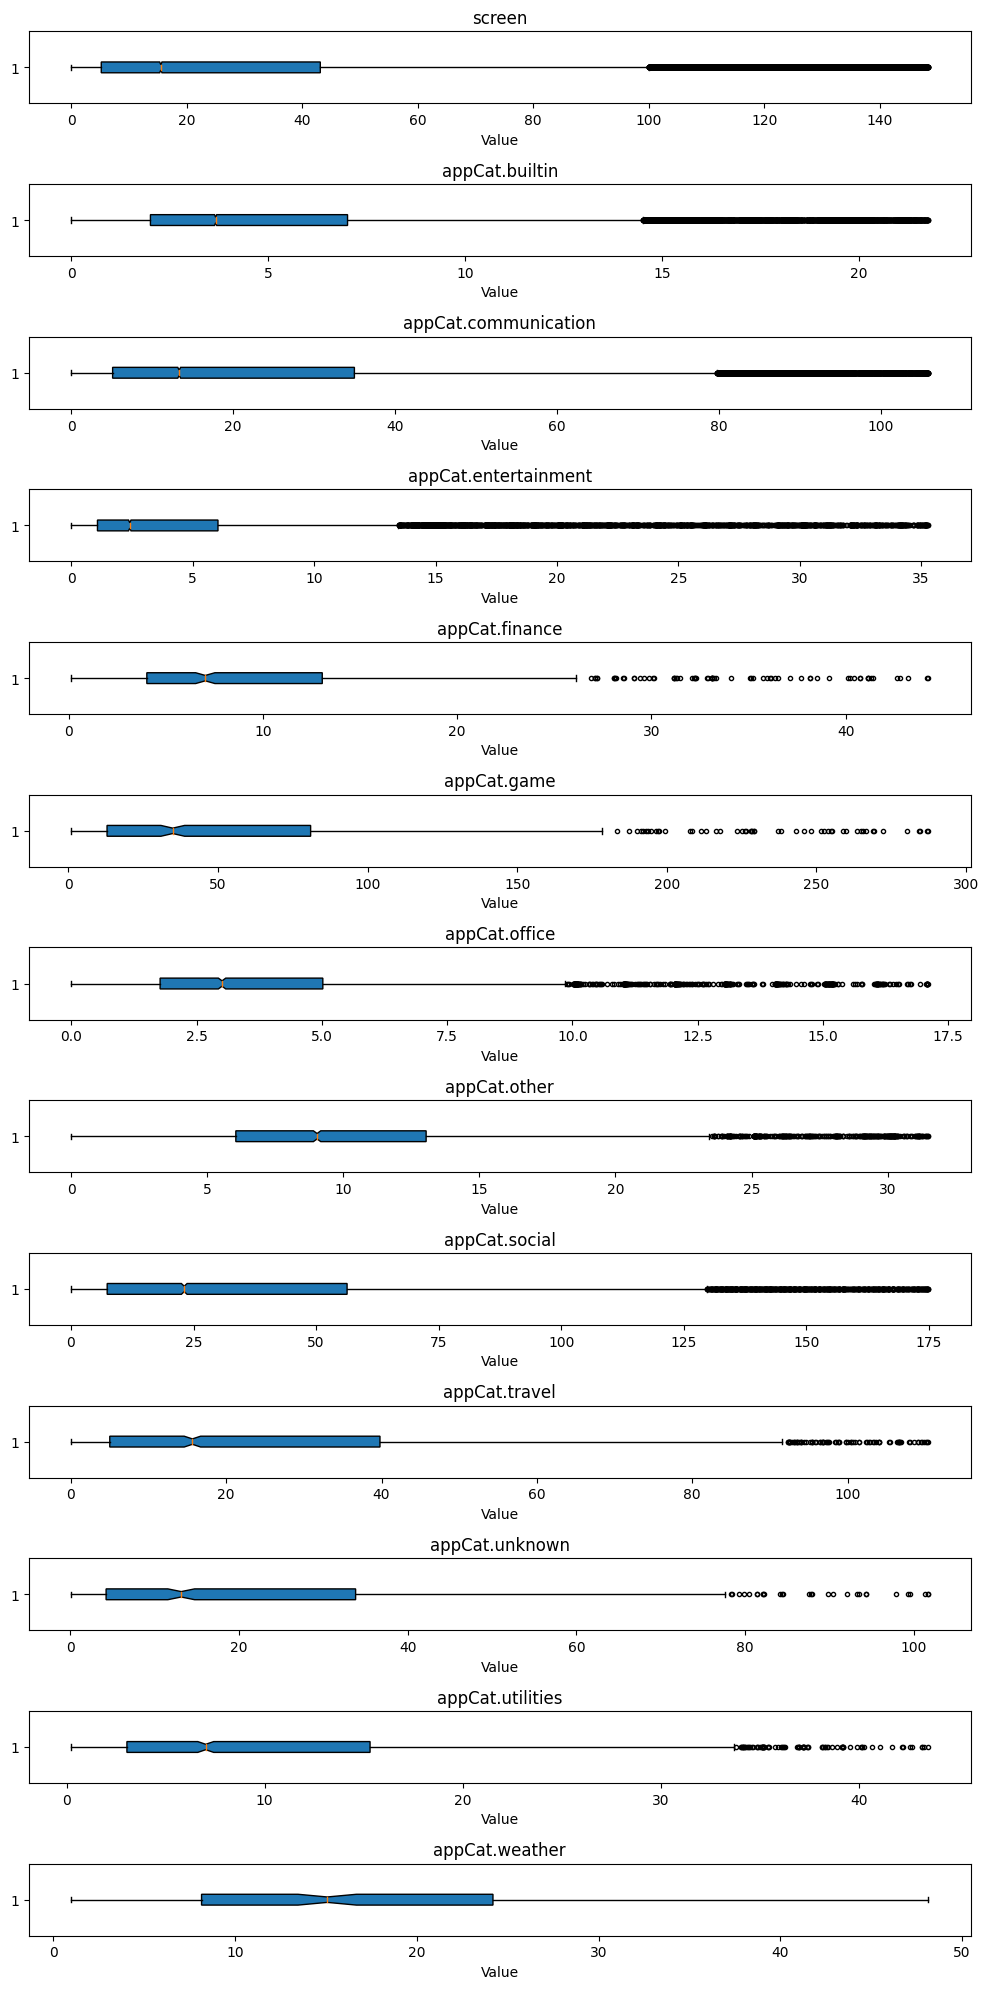

In [34]:
# Including all app categories and screen time for box plots

# Prepare the figure to plot box plots for the expanded set of variables
fig, axs = plt.subplots(len(variables_for_box_plots_all), 1, figsize=(10, 20))

# Ensuring that we plot even if there's only one variable (turning axs into an array if it's not)
if len(variables_for_box_plots_all) == 1:
    axs = [axs]

for ax, variable in zip(axs, variables_for_box_plots_all):
    var_df = df1[df1['variable'] == variable]
    
    # Creating box plots with increased flier size for better visibility
    ax.boxplot(var_df['value'], vert=False, patch_artist=True, notch=True, flierprops={'marker':'o', 'markersize':3})
    ax.set_title(variable)
    ax.set_xlabel('Value')

plt.tight_layout()
plt.show()


# Pivot Data

### scores and time

In [35]:
score_variables = ["mood", "circumplex.arousal", "circumplex.valence", "activity"]

# Creating a dataset with only the selected variables
df_score = df1[df1['variable'].isin(score_variables)]

# Creating another dataset with the rest of the variables
df_machine = df1[~df1['variable'].isin(score_variables)]

df_score['date'] = df_score['time'].dt.date
df_machine['date'] = df_machine['time'].dt.date


/var/folders/_1/g4tvh5tn2wb8t1qyc72n4cdr0000gn/T/ipykernel_26252/3639623860.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['date'] = df_score['time'].dt.date
/var/folders/_1/g4tvh5tn2wb8t1qyc72n4cdr0000gn/T/ipykernel_26252/3639623860.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_machine['date'] = df_machine['time'].dt.date


In [36]:
df_score

,index,id,time,variable,value,date
0,1,AS14.01,2014-02-26 13:00:00,mood,6.000000,2014-02-26
1,2,AS14.01,2014-02-26 15:00:00,mood,6.000000,2014-02-26
2,3,AS14.01,2014-02-26 18:00:00,mood,6.000000,2014-02-26
3,4,AS14.01,2014-02-26 21:00:00,mood,7.000000,2014-02-26
4,5,AS14.01,2014-02-27 09:00:00,mood,6.000000,2014-02-27
...,...,...,...,...,...,...
39887,39888,AS14.33,2014-05-30 16:00:00,activity,0.250000,2014-05-30
39888,39889,AS14.33,2014-05-30 19:00:00,activity,0.035714,2014-05-30
39889,39890,AS14.33,2014-05-30 20:00:00,activity,0.008403,2014-05-30
39890,39891,AS14.33,2014-05-30 21:00:00,activity,0.017094,2014-05-30


In [37]:
df_scores_daily = df_score.drop('time', axis = 1)
df_machine_daily = df_machine.drop('time', axis = 1)

In [38]:
df_scores_daily
#df_scores_daily.to_csv('scores_daily.csv')

,index,id,variable,value,date
0,1,AS14.01,mood,6.000000,2014-02-26
1,2,AS14.01,mood,6.000000,2014-02-26
2,3,AS14.01,mood,6.000000,2014-02-26
3,4,AS14.01,mood,7.000000,2014-02-26
4,5,AS14.01,mood,6.000000,2014-02-27
...,...,...,...,...,...
39887,39888,AS14.33,activity,0.250000,2014-05-30
39888,39889,AS14.33,activity,0.035714,2014-05-30
39889,39890,AS14.33,activity,0.008403,2014-05-30
39890,39891,AS14.33,activity,0.017094,2014-05-30


In [39]:
grouped_scores = df_scores_daily.groupby(['id', 'date', 'variable'])['value'].mean().reset_index()
grouped_scores

,id,date,variable,value
0,AS14.01,2014-02-26,circumplex.arousal,-0.250000
1,AS14.01,2014-02-26,circumplex.valence,0.750000
2,AS14.01,2014-02-26,mood,6.250000
3,AS14.01,2014-02-27,circumplex.arousal,0.000000
4,AS14.01,2014-02-27,circumplex.valence,0.333333
...,...,...,...,...
4985,AS14.33,2014-05-30,circumplex.valence,-0.400000
4986,AS14.33,2014-05-30,mood,6.800000
4987,AS14.33,2014-05-31,circumplex.arousal,-2.000000
4988,AS14.33,2014-05-31,circumplex.valence,1.000000


In [40]:
grouped_times = df_machine_daily.groupby(['id', 'date', 'variable'])['value'].sum().reset_index()
grouped_times

,id,date,variable,value
0,AS14.01,2014-02-17,call,2.000000
1,AS14.01,2014-02-18,call,1.000000
2,AS14.01,2014-02-19,call,7.000000
3,AS14.01,2014-02-19,sms,2.000000
4,AS14.01,2014-02-20,call,2.000000
...,...,...,...,...
10255,AS14.33,2014-05-30,appCat.travel,915.714000
10256,AS14.33,2014-05-30,appCat.unknown,8.072000
10257,AS14.33,2014-05-30,appCat.utilities,155.922000
10258,AS14.33,2014-05-30,call,4.000000


In [41]:
#df_machine_daily.to_csv('time_daily.csv')

In [42]:
df_scores_daily['id'].nunique(), df_scores_daily['date'].nunique()

(27, 100)

In [43]:
df_machine_daily['id'].nunique(), df_machine_daily['date'].nunique()

(27, 112)

### pivot scores 

In [44]:
scores_pivot_df = df_scores_daily.pivot_table(index=['id','date'], columns='variable', values='value', aggfunc='mean').reset_index()
scores_pivot_df

variable,id,date,activity,circumplex.arousal,circumplex.valence,mood
0,AS14.01,2014-02-26,NaN,-0.250000,0.750000,6.250000
1,AS14.01,2014-02-27,NaN,0.000000,0.333333,6.333333
2,AS14.01,2014-03-20,0.081548,NaN,NaN,NaN
3,AS14.01,2014-03-21,0.134050,0.200000,0.200000,6.200000
4,AS14.01,2014-03-22,0.236880,0.600000,0.500000,6.400000
...,...,...,...,...,...,...
1301,AS14.33,2014-05-27,0.012704,-0.600000,0.400000,6.200000
1302,AS14.33,2014-05-28,0.103301,0.000000,1.200000,8.200000
1303,AS14.33,2014-05-29,0.169354,-1.333333,1.000000,7.000000
1304,AS14.33,2014-05-30,0.192901,-0.800000,-0.400000,6.800000


### pivot time

In [45]:
time_pivot_df = df_machine_daily.pivot_table(index=['id','date'], columns='variable', values='value', aggfunc='sum').reset_index()

In [46]:
time_pivot_df

variable,id,date,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,2.0
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,AS14.33,2014-05-26,571.902,750.571,79.963,NaN,NaN,NaN,140.446,1508.191,NaN,NaN,NaN,NaN,10.0,1118.782999,3.0
1911,AS14.33,2014-05-27,269.550,771.182,32.137,NaN,NaN,NaN,57.535,1252.079,NaN,NaN,56.173,NaN,1.0,1508.516001,2.0
1912,AS14.33,2014-05-28,1093.741,1057.568,153.121,NaN,NaN,38.262,208.962,1817.695,NaN,NaN,30.666,NaN,10.0,3414.742998,1.0
1913,AS14.33,2014-05-29,248.063,198.112,5.018,NaN,NaN,NaN,29.202,377.179,0.939,NaN,3.199,NaN,5.0,395.046000,1.0


In [47]:
time_pivot_df.isnull().sum()

variable
id                         0
date                       0
appCat.builtin           723
appCat.communication     734
appCat.entertainment    1169
appCat.finance          1725
appCat.game             1739
appCat.office           1699
appCat.other             801
appCat.social            943
appCat.travel           1496
appCat.unknown          1674
appCat.utilities        1489
appCat.weather          1804
call                     577
screen                   711
sms                     1181
dtype: int64

# Handle Merged Data

In [48]:
app_categories_columns = [
    "appCat.builtin", "appCat.communication", "appCat.entertainment",
    "appCat.finance", "appCat.game", "appCat.office", "appCat.other",
    "appCat.social", "appCat.travel", "appCat.unknown", "appCat.utilities",
    "appCat.weather"
]

# Ensure the DataFrame has these columns; this prevents KeyError if some columns don't exist
existing_app_columns = [col for col in app_categories_columns if col in time_pivot_df.columns]

# Replace NaN values with 0 for the specified app category columns
time_pivot_df[existing_app_columns] = time_pivot_df[existing_app_columns].fillna(0)
time_pivot_df



variable,id,date,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
0,AS14.01,2014-02-17,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,2.0,NaN,NaN
1,AS14.01,2014-02-18,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,1.0,NaN,NaN
2,AS14.01,2014-02-19,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,7.0,NaN,2.0
3,AS14.01,2014-02-20,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,2.0,NaN,3.0
4,AS14.01,2014-02-21,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,AS14.33,2014-05-26,571.902,750.571,79.963,0.0,0.0,0.000,140.446,1508.191,0.000,0.000,0.000,0.0,10.0,1118.782999,3.0
1911,AS14.33,2014-05-27,269.550,771.182,32.137,0.0,0.0,0.000,57.535,1252.079,0.000,0.000,56.173,0.0,1.0,1508.516001,2.0
1912,AS14.33,2014-05-28,1093.741,1057.568,153.121,0.0,0.0,38.262,208.962,1817.695,0.000,0.000,30.666,0.0,10.0,3414.742998,1.0
1913,AS14.33,2014-05-29,248.063,198.112,5.018,0.0,0.0,0.000,29.202,377.179,0.939,0.000,3.199,0.0,5.0,395.046000,1.0


In [49]:
columns_to_interpolate = ['call',  'sms']

# Perform linear interpolation on the specified columns
time_pivot_df[columns_to_interpolate] = time_pivot_df[columns_to_interpolate].interpolate(method='linear', limit_direction='forward', axis=0)

# Perform linear interpolation on the specified columns
time_pivot_df[columns_to_interpolate] = time_pivot_df[columns_to_interpolate].interpolate(method='linear', limit_direction='backward', axis=0)
time_pivot_df
time_pivot_df.to_csv('out.csv') 



In [50]:
merged_df = pd.merge(scores_pivot_df, time_pivot_df, on=['id','date'], how='outer')
merged_df

variable,id,date,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,...,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,2.0,NaN,2.0
1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,1.0,NaN,2.0
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,7.0,NaN,2.0
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,2.0,NaN,3.0
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,2.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,-0.600000,0.4,6.2,269.550,771.182,32.137,0.0,...,0.000,57.535,1252.079,0.000,0.000,56.173,0.0,1.0,1508.516001,2.0
1969,AS14.33,2014-05-28,0.103301,0.000000,1.2,8.2,1093.741,1057.568,153.121,0.0,...,38.262,208.962,1817.695,0.000,0.000,30.666,0.0,10.0,3414.742998,1.0
1970,AS14.33,2014-05-29,0.169354,-1.333333,1.0,7.0,248.063,198.112,5.018,0.0,...,0.000,29.202,377.179,0.939,0.000,3.199,0.0,5.0,395.046000,1.0
1971,AS14.33,2014-05-30,0.192901,-0.800000,-0.4,6.8,930.885,992.321,21.178,0.0,...,0.000,52.610,1706.765,915.714,8.072,155.922,0.0,4.0,3525.688999,1.0


In [51]:
columns_to_interpolate = ['call', 'sms', 'activity']
merged_df[columns_to_interpolate] = merged_df.groupby('id')[columns_to_interpolate].transform(lambda group: group.interpolate(method='linear', limit_direction='both', axis=0))
merged_df


variable,id,date,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,...,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
0,AS14.01,2014-02-17,0.081548,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,2.0,NaN,2.0
1,AS14.01,2014-02-18,0.081548,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,1.0,NaN,2.0
2,AS14.01,2014-02-19,0.081548,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,7.0,NaN,2.0
3,AS14.01,2014-02-20,0.081548,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,2.0,NaN,3.0
4,AS14.01,2014-02-21,0.081548,NaN,NaN,NaN,0.000,0.000,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,2.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,-0.600000,0.4,6.2,269.550,771.182,32.137,0.0,...,0.000,57.535,1252.079,0.000,0.000,56.173,0.0,1.0,1508.516001,2.0
1969,AS14.33,2014-05-28,0.103301,0.000000,1.2,8.2,1093.741,1057.568,153.121,0.0,...,38.262,208.962,1817.695,0.000,0.000,30.666,0.0,10.0,3414.742998,1.0
1970,AS14.33,2014-05-29,0.169354,-1.333333,1.0,7.0,248.063,198.112,5.018,0.0,...,0.000,29.202,377.179,0.939,0.000,3.199,0.0,5.0,395.046000,1.0
1971,AS14.33,2014-05-30,0.192901,-0.800000,-0.4,6.8,930.885,992.321,21.178,0.0,...,0.000,52.610,1706.765,915.714,8.072,155.922,0.0,4.0,3525.688999,1.0


In [52]:
columns_to_check = ['mood']


df_cleaned = merged_df.dropna(subset=columns_to_check)
df_cleaned

variable,id,date,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,...,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
7,AS14.01,2014-02-26,0.081548,-0.250000,0.750000,6.250000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,NaN,2.00
8,AS14.01,2014-02-27,0.081548,0.000000,0.333333,6.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,1.75
26,AS14.01,2014-03-21,0.134050,0.200000,0.200000,6.200000,1090.617,2850.042,100.898,49.544,...,5.479,50.465,3121.747,167.373,0.000,229.138,0.000,6.0,2867.963000,1.25
27,AS14.01,2014-03-22,0.236880,0.600000,0.500000,6.400000,476.737,1946.683,4.010,21.076,...,0.000,60.565,439.632,37.305,0.000,53.188,0.000,3.0,3038.464000,1.00
28,AS14.01,2014-03-23,0.142741,0.200000,0.800000,6.800000,540.915,2680.535,4.028,43.403,...,0.000,40.604,649.414,0.000,0.000,30.086,30.386,6.5,2780.277001,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,-0.600000,0.400000,6.200000,269.550,771.182,32.137,0.000,...,0.000,57.535,1252.079,0.000,0.000,56.173,0.000,1.0,1508.516001,2.00
1969,AS14.33,2014-05-28,0.103301,0.000000,1.200000,8.200000,1093.741,1057.568,153.121,0.000,...,38.262,208.962,1817.695,0.000,0.000,30.666,0.000,10.0,3414.742998,1.00
1970,AS14.33,2014-05-29,0.169354,-1.333333,1.000000,7.000000,248.063,198.112,5.018,0.000,...,0.000,29.202,377.179,0.939,0.000,3.199,0.000,5.0,395.046000,1.00
1971,AS14.33,2014-05-30,0.192901,-0.800000,-0.400000,6.800000,930.885,992.321,21.178,0.000,...,0.000,52.610,1706.765,915.714,8.072,155.922,0.000,4.0,3525.688999,1.00


In [53]:
not_null_columns = [
    "circumplex.valence"
]

# Ensure the DataFrame has these columns; this prevents KeyError if some columns don't exist
existing_app_columns = [col for col in not_null_columns if col in df_cleaned.columns]

# Replace NaN values with 0 for the specified app category columns
df_cleaned[existing_app_columns] = df_cleaned[existing_app_columns].fillna(0)
df_cleaned


/var/folders/_1/g4tvh5tn2wb8t1qyc72n4cdr0000gn/T/ipykernel_26252/1072149874.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[existing_app_columns] = df_cleaned[existing_app_columns].fillna(0)


variable,id,date,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,...,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
7,AS14.01,2014-02-26,0.081548,-0.250000,0.750000,6.250000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,NaN,2.00
8,AS14.01,2014-02-27,0.081548,0.000000,0.333333,6.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,1.75
26,AS14.01,2014-03-21,0.134050,0.200000,0.200000,6.200000,1090.617,2850.042,100.898,49.544,...,5.479,50.465,3121.747,167.373,0.000,229.138,0.000,6.0,2867.963000,1.25
27,AS14.01,2014-03-22,0.236880,0.600000,0.500000,6.400000,476.737,1946.683,4.010,21.076,...,0.000,60.565,439.632,37.305,0.000,53.188,0.000,3.0,3038.464000,1.00
28,AS14.01,2014-03-23,0.142741,0.200000,0.800000,6.800000,540.915,2680.535,4.028,43.403,...,0.000,40.604,649.414,0.000,0.000,30.086,30.386,6.5,2780.277001,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,-0.600000,0.400000,6.200000,269.550,771.182,32.137,0.000,...,0.000,57.535,1252.079,0.000,0.000,56.173,0.000,1.0,1508.516001,2.00
1969,AS14.33,2014-05-28,0.103301,0.000000,1.200000,8.200000,1093.741,1057.568,153.121,0.000,...,38.262,208.962,1817.695,0.000,0.000,30.666,0.000,10.0,3414.742998,1.00
1970,AS14.33,2014-05-29,0.169354,-1.333333,1.000000,7.000000,248.063,198.112,5.018,0.000,...,0.000,29.202,377.179,0.939,0.000,3.199,0.000,5.0,395.046000,1.00
1971,AS14.33,2014-05-30,0.192901,-0.800000,-0.400000,6.800000,930.885,992.321,21.178,0.000,...,0.000,52.610,1706.765,915.714,8.072,155.922,0.000,4.0,3525.688999,1.00


In [54]:
app_categories_columns = [
    "appCat.builtin", "appCat.communication", "appCat.entertainment",
    "appCat.finance", "appCat.game", "appCat.office", "appCat.other",
    "appCat.social", "appCat.travel", "appCat.unknown", "appCat.utilities",
    "appCat.weather",
]

# Ensure the DataFrame has these columns; this prevents KeyError if some columns don't exist
existing_app_columns = [col for col in app_categories_columns if col in df_cleaned.columns]

# Replace NaN values with 0 for the specified app category columns
df_cleaned[existing_app_columns] = df_cleaned[existing_app_columns].fillna(0)
df_cleaned


/var/folders/_1/g4tvh5tn2wb8t1qyc72n4cdr0000gn/T/ipykernel_26252/3435289872.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[existing_app_columns] = df_cleaned[existing_app_columns].fillna(0)


variable,id,date,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,...,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
7,AS14.01,2014-02-26,0.081548,-0.250000,0.750000,6.250000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,NaN,2.00
8,AS14.01,2014-02-27,0.081548,0.000000,0.333333,6.333333,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.5,NaN,1.75
26,AS14.01,2014-03-21,0.134050,0.200000,0.200000,6.200000,1090.617,2850.042,100.898,49.544,...,5.479,50.465,3121.747,167.373,0.000,229.138,0.000,6.0,2867.963000,1.25
27,AS14.01,2014-03-22,0.236880,0.600000,0.500000,6.400000,476.737,1946.683,4.010,21.076,...,0.000,60.565,439.632,37.305,0.000,53.188,0.000,3.0,3038.464000,1.00
28,AS14.01,2014-03-23,0.142741,0.200000,0.800000,6.800000,540.915,2680.535,4.028,43.403,...,0.000,40.604,649.414,0.000,0.000,30.086,30.386,6.5,2780.277001,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,-0.600000,0.400000,6.200000,269.550,771.182,32.137,0.000,...,0.000,57.535,1252.079,0.000,0.000,56.173,0.000,1.0,1508.516001,2.00
1969,AS14.33,2014-05-28,0.103301,0.000000,1.200000,8.200000,1093.741,1057.568,153.121,0.000,...,38.262,208.962,1817.695,0.000,0.000,30.666,0.000,10.0,3414.742998,1.00
1970,AS14.33,2014-05-29,0.169354,-1.333333,1.000000,7.000000,248.063,198.112,5.018,0.000,...,0.000,29.202,377.179,0.939,0.000,3.199,0.000,5.0,395.046000,1.00
1971,AS14.33,2014-05-30,0.192901,-0.800000,-0.400000,6.800000,930.885,992.321,21.178,0.000,...,0.000,52.610,1706.765,915.714,8.072,155.922,0.000,4.0,3525.688999,1.00


In [55]:
columns_to_sum = [
    "appCat.builtin", "appCat.communication", "appCat.entertainment",
    "appCat.finance", "appCat.game", "appCat.office", "appCat.other",
    "appCat.social", "appCat.travel", "appCat.unknown", "appCat.utilities",
    "appCat.weather"
]

# Use apply to iterate over rows for rows where 'screen' is NaN
df_cleaned.loc[df_cleaned['screen'].isna(), 'screen'] = df_cleaned[df_cleaned['screen'].isna()].apply(
    lambda row: row[columns_to_sum].sum(), axis=1)

df_cleaned

variable,id,date,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,...,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms
7,AS14.01,2014-02-26,0.081548,-0.250000,0.750000,6.250000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.000000,2.00
8,AS14.01,2014-02-27,0.081548,0.000000,0.333333,6.333333,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.5,0.000000,1.75
26,AS14.01,2014-03-21,0.134050,0.200000,0.200000,6.200000,1090.617,2850.042,100.898,49.544,...,5.479,50.465,3121.747,167.373,0.000,229.138,0.000,6.0,2867.963000,1.25
27,AS14.01,2014-03-22,0.236880,0.600000,0.500000,6.400000,476.737,1946.683,4.010,21.076,...,0.000,60.565,439.632,37.305,0.000,53.188,0.000,3.0,3038.464000,1.00
28,AS14.01,2014-03-23,0.142741,0.200000,0.800000,6.800000,540.915,2680.535,4.028,43.403,...,0.000,40.604,649.414,0.000,0.000,30.086,30.386,6.5,2780.277001,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,-0.600000,0.400000,6.200000,269.550,771.182,32.137,0.000,...,0.000,57.535,1252.079,0.000,0.000,56.173,0.000,1.0,1508.516001,2.00
1969,AS14.33,2014-05-28,0.103301,0.000000,1.200000,8.200000,1093.741,1057.568,153.121,0.000,...,38.262,208.962,1817.695,0.000,0.000,30.666,0.000,10.0,3414.742998,1.00
1970,AS14.33,2014-05-29,0.169354,-1.333333,1.000000,7.000000,248.063,198.112,5.018,0.000,...,0.000,29.202,377.179,0.939,0.000,3.199,0.000,5.0,395.046000,1.00
1971,AS14.33,2014-05-30,0.192901,-0.800000,-0.400000,6.800000,930.885,992.321,21.178,0.000,...,0.000,52.610,1706.765,915.714,8.072,155.922,0.000,4.0,3525.688999,1.00


In [56]:
df_cleaned.isnull().sum()

variable
id                      0
date                    0
activity                0
circumplex.arousal      0
circumplex.valence      0
mood                    0
appCat.builtin          0
appCat.communication    0
appCat.entertainment    0
appCat.finance          0
appCat.game             0
appCat.office           0
appCat.other            0
appCat.social           0
appCat.travel           0
appCat.unknown          0
appCat.utilities        0
appCat.weather          0
call                    0
screen                  0
sms                     0
dtype: int64

In [57]:
def custom_3day_avg(series):
    custom_avg = series.copy()
    for i in range(1, len(series)):
        custom_avg[i] = series[:i+1].tail(min(3, i+1)).mean()
    return custom_avg

def custom_7day_avg(series):
    custom_avg = series.copy()
    for i in range(1, len(series)):
        custom_avg[i] = series[:i+1].tail(min(7, i+1)).mean()
    return custom_avg

In [58]:
df_cleaned['3_day_avg_mood'] = df_cleaned.groupby('id')['mood'].transform(custom_3day_avg)
df_cleaned['7_day_avg_activity'] = df_cleaned.groupby('id')['activity'].transform(custom_7day_avg)
df_cleaned

/var/folders/_1/g4tvh5tn2wb8t1qyc72n4cdr0000gn/T/ipykernel_26252/847368150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['3_day_avg_mood'] = df_cleaned.groupby('id')['mood'].transform(custom_3day_avg)
/var/folders/_1/g4tvh5tn2wb8t1qyc72n4cdr0000gn/T/ipykernel_26252/847368150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['7_day_avg_activity'] = df_cleaned.groupby('id')['activity'].transform(custom_7day_avg)


variable,id,date,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,...,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,3_day_avg_mood,7_day_avg_activity
7,AS14.01,2014-02-26,0.081548,-0.250000,0.750000,6.250000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.0,0.000000,2.00,6.450000,0.124838
8,AS14.01,2014-02-27,0.081548,0.000000,0.333333,6.333333,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,2.5,0.000000,1.75,6.783333,0.135975
26,AS14.01,2014-03-21,0.134050,0.200000,0.200000,6.200000,1090.617,2850.042,100.898,49.544,...,3121.747,167.373,0.000,229.138,0.000,6.0,2867.963000,1.25,7.483333,0.074974
27,AS14.01,2014-03-22,0.236880,0.600000,0.500000,6.400000,476.737,1946.683,4.010,21.076,...,439.632,37.305,0.000,53.188,0.000,3.0,3038.464000,1.00,7.200000,0.077086
28,AS14.01,2014-03-23,0.142741,0.200000,0.800000,6.800000,540.915,2680.535,4.028,43.403,...,649.414,0.000,0.000,30.086,30.386,6.5,2780.277001,1.00,6.933333,0.076476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,-0.600000,0.400000,6.200000,269.550,771.182,32.137,0.000,...,1252.079,0.000,0.000,56.173,0.000,1.0,1508.516001,2.00,6.200000,0.012704
1969,AS14.33,2014-05-28,0.103301,0.000000,1.200000,8.200000,1093.741,1057.568,153.121,0.000,...,1817.695,0.000,0.000,30.666,0.000,10.0,3414.742998,1.00,8.200000,0.103301
1970,AS14.33,2014-05-29,0.169354,-1.333333,1.000000,7.000000,248.063,198.112,5.018,0.000,...,377.179,0.939,0.000,3.199,0.000,5.0,395.046000,1.00,7.000000,0.169354
1971,AS14.33,2014-05-30,0.192901,-0.800000,-0.400000,6.800000,930.885,992.321,21.178,0.000,...,1706.765,915.714,8.072,155.922,0.000,4.0,3525.688999,1.00,6.800000,0.192901


In [59]:
df_cleaned['productivity_to_social_ratio'] = (df_cleaned['appCat.finance'] + df_cleaned['appCat.office']) +1/ (df_cleaned['appCat.entertainment'] + df_cleaned['appCat.social']+1)
df_cleaned

/var/folders/_1/g4tvh5tn2wb8t1qyc72n4cdr0000gn/T/ipykernel_26252/2263397007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['productivity_to_social_ratio'] = (df_cleaned['appCat.finance'] + df_cleaned['appCat.office']) +1/ (df_cleaned['appCat.entertainment'] + df_cleaned['appCat.social']+1)


variable,id,date,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,3_day_avg_mood,7_day_avg_activity,productivity_to_social_ratio
7,AS14.01,2014-02-26,0.081548,-0.250000,0.750000,6.250000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.0,0.000000,2.00,6.450000,0.124838,1.000000
8,AS14.01,2014-02-27,0.081548,0.000000,0.333333,6.333333,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,2.5,0.000000,1.75,6.783333,0.135975,1.000000
26,AS14.01,2014-03-21,0.134050,0.200000,0.200000,6.200000,1090.617,2850.042,100.898,49.544,...,167.373,0.000,229.138,0.000,6.0,2867.963000,1.25,7.483333,0.074974,55.023310
27,AS14.01,2014-03-22,0.236880,0.600000,0.500000,6.400000,476.737,1946.683,4.010,21.076,...,37.305,0.000,53.188,0.000,3.0,3038.464000,1.00,7.200000,0.077086,21.078249
28,AS14.01,2014-03-23,0.142741,0.200000,0.800000,6.800000,540.915,2680.535,4.028,43.403,...,0.000,0.000,30.086,30.386,6.5,2780.277001,1.00,6.933333,0.076476,43.404528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,-0.600000,0.400000,6.200000,269.550,771.182,32.137,0.000,...,0.000,0.000,56.173,0.000,1.0,1508.516001,2.00,6.200000,0.012704,0.000778
1969,AS14.33,2014-05-28,0.103301,0.000000,1.200000,8.200000,1093.741,1057.568,153.121,0.000,...,0.000,0.000,30.666,0.000,10.0,3414.742998,1.00,8.200000,0.103301,38.262507
1970,AS14.33,2014-05-29,0.169354,-1.333333,1.000000,7.000000,248.063,198.112,5.018,0.000,...,0.939,0.000,3.199,0.000,5.0,395.046000,1.00,7.000000,0.169354,0.002610
1971,AS14.33,2014-05-30,0.192901,-0.800000,-0.400000,6.800000,930.885,992.321,21.178,0.000,...,915.714,8.072,155.922,0.000,4.0,3525.688999,1.00,6.800000,0.192901,0.000578


In [60]:
# Assuming 'df' is your DataFrame and 'grade' is your continuous variable
df_cleaned['mood_quantiles'] = pd.qcut(df_cleaned['mood'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df_cleaned

/var/folders/_1/g4tvh5tn2wb8t1qyc72n4cdr0000gn/T/ipykernel_26252/1082056840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['mood_quantiles'] = pd.qcut(df_cleaned['mood'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


variable,id,date,activity,circumplex.arousal,circumplex.valence,mood,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,...,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,3_day_avg_mood,7_day_avg_activity,productivity_to_social_ratio,mood_quantiles
7,AS14.01,2014-02-26,0.081548,-0.250000,0.750000,6.250000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.0,0.000000,2.00,6.450000,0.124838,1.000000,Q1
8,AS14.01,2014-02-27,0.081548,0.000000,0.333333,6.333333,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,2.5,0.000000,1.75,6.783333,0.135975,1.000000,Q1
26,AS14.01,2014-03-21,0.134050,0.200000,0.200000,6.200000,1090.617,2850.042,100.898,49.544,...,0.000,229.138,0.000,6.0,2867.963000,1.25,7.483333,0.074974,55.023310,Q1
27,AS14.01,2014-03-22,0.236880,0.600000,0.500000,6.400000,476.737,1946.683,4.010,21.076,...,0.000,53.188,0.000,3.0,3038.464000,1.00,7.200000,0.077086,21.078249,Q1
28,AS14.01,2014-03-23,0.142741,0.200000,0.800000,6.800000,540.915,2680.535,4.028,43.403,...,0.000,30.086,30.386,6.5,2780.277001,1.00,6.933333,0.076476,43.404528,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,-0.600000,0.400000,6.200000,269.550,771.182,32.137,0.000,...,0.000,56.173,0.000,1.0,1508.516001,2.00,6.200000,0.012704,0.000778,Q1
1969,AS14.33,2014-05-28,0.103301,0.000000,1.200000,8.200000,1093.741,1057.568,153.121,0.000,...,0.000,30.666,0.000,10.0,3414.742998,1.00,8.200000,0.103301,38.262507,Q4
1970,AS14.33,2014-05-29,0.169354,-1.333333,1.000000,7.000000,248.063,198.112,5.018,0.000,...,0.000,3.199,0.000,5.0,395.046000,1.00,7.000000,0.169354,0.002610,Q2
1971,AS14.33,2014-05-30,0.192901,-0.800000,-0.400000,6.800000,930.885,992.321,21.178,0.000,...,8.072,155.922,0.000,4.0,3525.688999,1.00,6.800000,0.192901,0.000578,Q2


In [61]:
df_cleaned.to_csv('out.csv') 